In [23]:
! pip install gdown
! gdown --no-check-certificate --folder 'https://drive.google.com/drive/folders/1XP7385hAz8Uh-0ved0j_mm6VLECNdamV?usp=drive_link'


Retrieving folder list
/usr/local/lib/python3.10/dist-packages/urllib3/connectionpool.py:1100: InsecureRequestWarning: Unverified HTTPS request is being made to host 'drive.google.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
Processing file 1B2bwZUD3WuKmuXId67hPns7n1QSyFjLO Dataset.csv
Retrieving folder list completed
Building directory structure
Building directory structure completed
/usr/local/lib/python3.10/dist-packages/urllib3/connectionpool.py:1100: InsecureRequestWarning: Unverified HTTPS request is being made to host 'drive.google.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/urllib3/connectionpool.py:1100: InsecureRequestWarning: Unverified HTTPS request is being made to host 'doc-0o-bc-docs.googleusercontent.com'. Adding 

#Importing libraries

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.feature_selection import VarianceThreshold

In [25]:
df = pd.read_csv('/content/data/Dataset.csv', index_col=0)

In [26]:
df.head()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
Id,,,,,,,,,,,,
1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [27]:
df.shape

(252000, 12)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 252000 entries, 1 to 252000
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Income             252000 non-null  int64 
 1   Age                252000 non-null  int64 
 2   Experience         252000 non-null  int64 
 3   Married/Single     252000 non-null  object
 4   House_Ownership    252000 non-null  object
 5   Car_Ownership      252000 non-null  object
 6   Profession         252000 non-null  object
 7   CITY               252000 non-null  object
 8   STATE              252000 non-null  object
 9   CURRENT_JOB_YRS    252000 non-null  int64 
 10  CURRENT_HOUSE_YRS  252000 non-null  int64 
 11  Risk_Flag          252000 non-null  int64 
dtypes: int64(6), object(6)
memory usage: 25.0+ MB


#Removing duplicate rows

In [29]:
df.duplicated().sum()

208810

In [30]:
df.drop_duplicates(inplace = True)

In [31]:
df.shape

(43190, 12)

#Correlation Analysis

In [32]:
correlation = df.corr()['Risk_Flag'].abs().sort_values(ascending=False)

<ipython-input-32-42c2d73de71a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()['Risk_Flag'].abs().sort_values(ascending=False)


In [33]:
correlation

Risk_Flag            1.000000
Experience           0.010703
CURRENT_HOUSE_YRS    0.004793
Age                  0.003828
CURRENT_JOB_YRS      0.003479
Income               0.000527
Name: Risk_Flag, dtype: float64

#Split train and test data

In [34]:
train_set, test_set = train_test_split(df, test_size=0.25, random_state=42)

#Encoding categorical features

In [35]:
categorical_cols = ['Married/Single', 'House_Ownership', 'Car_Ownership', 'Profession', 'CITY', 'STATE']
train_set_encoded = pd.get_dummies(train_set, columns=categorical_cols)
test_set_encoded = pd.get_dummies(test_set, columns=categorical_cols)

#Normalizing

In [36]:
scaler = MinMaxScaler()
train_set_normal= pd.DataFrame(scaler.fit_transform(train_set_encoded), columns=train_set_encoded.columns, index=train_set_encoded.index)
test_set_normal = pd.DataFrame(scaler.transform(test_set_encoded), columns=test_set_encoded.columns, index=test_set_encoded.index)

#Checking label distribution

In [37]:
target_column = 'Risk_Flag'

label_distribution = train_set_normal[target_column].value_counts()
print("Label Distribution:\n", label_distribution)


Label Distribution:
 0.0    26013
1.0     6379
Name: Risk_Flag, dtype: int64


In [38]:
under_sampler = RandomUnderSampler(random_state=42)

In [39]:
X_train_resampled, y_train_resampled = under_sampler.fit_resample(train_set_normal.drop('Risk_Flag', axis=1), train_set_normal['Risk_Flag'])

In [40]:
new_label_distribution = pd.Series(y_train_resampled).value_counts()
print("New Label Distribution after Under-sampling:\n", new_label_distribution)

New Label Distribution after Under-sampling:
 0.0    6379
1.0    6379
Name: Risk_Flag, dtype: int64


# Feature Selection Based on Variance Threshold

In [41]:
selector = VarianceThreshold(threshold=0.01)
X_train_selected = selector.fit_transform(X_train_resampled)
X_test_selected = selector.transform(test_set_normal.drop('Risk_Flag', axis=1))

In [42]:
variances = selector.variances_
features = X_train_resampled.columns
features_selected = features[selector.get_support()]

In [43]:
features_removed = [feature for feature, var in zip(features, variances) if var < 0.01]
print("Features Removed:", features_removed)

Features Removed: ['CITY_Adoni', 'CITY_Agartala', 'CITY_Agra', 'CITY_Ahmedabad', 'CITY_Ahmednagar', 'CITY_Aizawl', 'CITY_Ajmer', 'CITY_Akola', 'CITY_Alappuzha', 'CITY_Aligarh', 'CITY_Allahabad', 'CITY_Alwar', 'CITY_Amaravati', 'CITY_Ambala', 'CITY_Ambarnath', 'CITY_Ambattur', 'CITY_Amravati', 'CITY_Amritsar', 'CITY_Amroha', 'CITY_Anand', 'CITY_Anantapur', 'CITY_Anantapuram[24]', 'CITY_Arrah', 'CITY_Asansol', 'CITY_Aurangabad', 'CITY_Aurangabad[39]', 'CITY_Avadi', 'CITY_Bahraich', 'CITY_Ballia', 'CITY_Bally', 'CITY_Bangalore', 'CITY_Baranagar', 'CITY_Barasat', 'CITY_Bardhaman', 'CITY_Bareilly', 'CITY_Bathinda', 'CITY_Begusarai', 'CITY_Belgaum', 'CITY_Bellary', 'CITY_Berhampore', 'CITY_Berhampur', 'CITY_Bettiah[33]', 'CITY_Bhagalpur', 'CITY_Bhalswa_Jahangir_Pur', 'CITY_Bharatpur', 'CITY_Bhatpara', 'CITY_Bhavnagar', 'CITY_Bhilai', 'CITY_Bhilwara', 'CITY_Bhimavaram', 'CITY_Bhind', 'CITY_Bhiwandi', 'CITY_Bhiwani', 'CITY_Bhopal', 'CITY_Bhubaneswar', 'CITY_Bhusawal', 'CITY_Bidar', 'CITY_Bidha

#Training model

In [44]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

In [45]:
X_test = test_set_normal.drop('Risk_Flag', axis=1)
y_test = test_set_normal['Risk_Flag']

#Decision tree

In [46]:
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train_resampled, y_train_resampled)

DecisionTreeClassifier(random_state=42)

In [47]:
dt_predictions = dt_classifier.predict(X_test)

In [48]:
print("Decision Tree Classifier Report:\n", classification_report(y_test, dt_predictions))

Decision Tree Classifier Report:
               precision    recall  f1-score   support

         0.0       0.80      0.49      0.61      8734
         1.0       0.19      0.49      0.27      2064

    accuracy                           0.49     10798
   macro avg       0.49      0.49      0.44     10798
weighted avg       0.68      0.49      0.55     10798



#SVM linear kernel

In [49]:
svm_classifier = SVC(kernel='linear', random_state=42)
svm_classifier.fit(X_train_resampled, y_train_resampled)

SVC(kernel='linear', random_state=42)

In [50]:
svm_predictions = svm_classifier.predict(X_test)

In [51]:
print("SVM Classifier Report:\n", classification_report(y_test, svm_predictions))

SVM Classifier Report:
               precision    recall  f1-score   support

         0.0       0.81      0.55      0.65      8734
         1.0       0.19      0.45      0.27      2064

    accuracy                           0.53     10798
   macro avg       0.50      0.50      0.46     10798
weighted avg       0.69      0.53      0.58     10798



#SVM RBF kernel

In [52]:
svm_rbf = SVC(kernel='rbf', random_state=42)
svm_rbf.fit(X_train_resampled, y_train_resampled)

SVC(random_state=42)

In [53]:
rbf_predictions = svm_rbf.predict(X_test)

In [54]:
print("SVM with RBF Kernel Classifier Report:\n", classification_report(y_test, rbf_predictions))

SVM with RBF Kernel Classifier Report:
               precision    recall  f1-score   support

         0.0       0.80      0.53      0.64      8734
         1.0       0.18      0.45      0.26      2064

    accuracy                           0.52     10798
   macro avg       0.49      0.49      0.45     10798
weighted avg       0.68      0.52      0.57     10798



#SVM POLY kernel

In [55]:
svm_poly = SVC(kernel='poly', degree=3, random_state=42)
svm_poly.fit(X_train_resampled, y_train_resampled)

SVC(kernel='poly', random_state=42)

In [56]:
poly_predictions = svm_poly.predict(X_test)

In [57]:
print("SVM with Polynomial Kernel Classifier Report:\n", classification_report(y_test, poly_predictions))

SVM with Polynomial Kernel Classifier Report:
               precision    recall  f1-score   support

         0.0       0.80      0.52      0.63      8734
         1.0       0.19      0.47      0.27      2064

    accuracy                           0.51     10798
   macro avg       0.50      0.49      0.45     10798
weighted avg       0.69      0.51      0.56     10798



#Confusion matrix

In [58]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
dt_conf_matrix = confusion_matrix(y_test, dt_predictions)

In [60]:
svm_conf_matrix = confusion_matrix(y_test, svm_predictions)

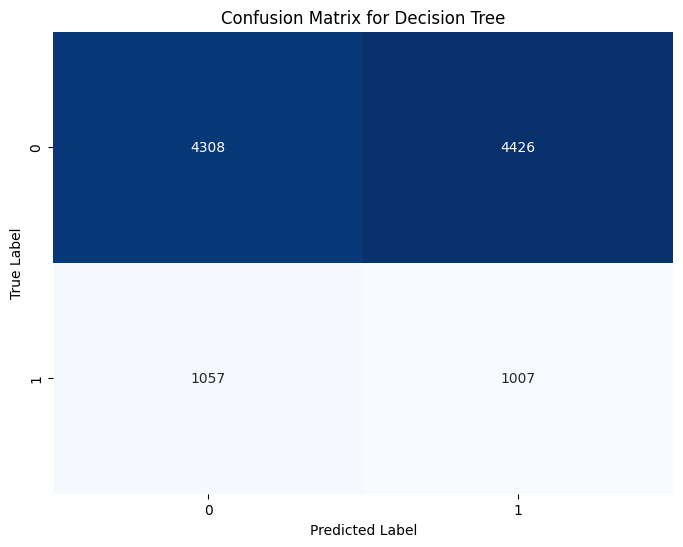

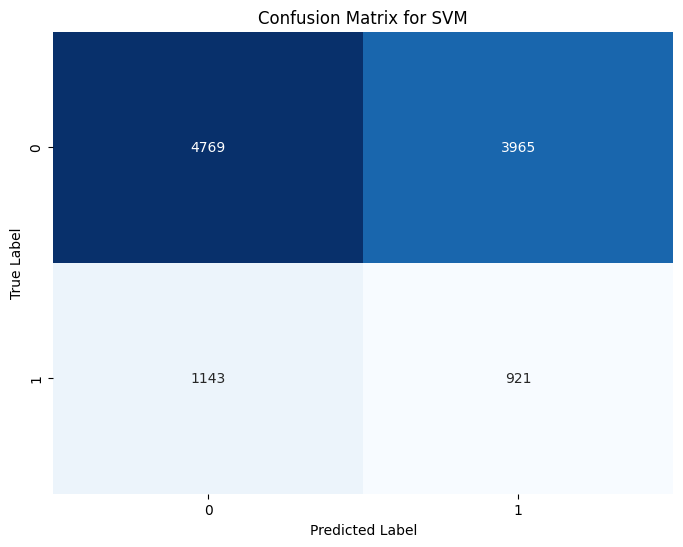

In [61]:
def plot_confusion_matrix(conf_matrix, title):
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(title)
    plt.show()

# Plot for Decision Tree
plot_confusion_matrix(dt_conf_matrix, 'Confusion Matrix for Decision Tree')

# Plot for SVM
plot_confusion_matrix(svm_conf_matrix, 'Confusion Matrix for SVM')

#Hyperparameter Tuning

In [62]:
from sklearn.model_selection import GridSearchCV

In [63]:
param_grid_dt = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'criterion': ['gini', 'entropy']
}

In [64]:
param_grid_svm = {
    'C': [0.1,10]
}

In [65]:
dt = DecisionTreeClassifier(random_state=42)
grid_search_dt = GridSearchCV(estimator=dt, param_grid=param_grid_dt, cv=5, scoring='accuracy', n_jobs=-1)

In [66]:
svm = SVC(kernel='linear', random_state=42)
grid_search_svm = GridSearchCV(estimator=svm, param_grid=param_grid_svm, cv=5, scoring='accuracy', n_jobs=-1)

In [67]:
grid_search_dt.fit(X_train_resampled, y_train_resampled)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30, 40, 50]},
             scoring='accuracy')

In [81]:
grid_search_svm.fit(X_train_resampled, y_train_resampled)

GridSearchCV(cv=5, estimator=SVC(kernel='linear', random_state=42), n_jobs=-1,
             param_grid={'C': [0.1, 10]}, scoring='accuracy')

In [82]:
best_dt = grid_search_dt.best_estimator_
dt_predictions = best_dt.predict(X_test)
print("Best Decision Tree:\n", classification_report(y_test, dt_predictions))

Best Decision Tree:
               precision    recall  f1-score   support

         0.0       0.79      0.48      0.60      8734
         1.0       0.17      0.46      0.25      2064

    accuracy                           0.48     10798
   macro avg       0.48      0.47      0.43     10798
weighted avg       0.67      0.48      0.53     10798



In [83]:
best_svm = grid_search_svm.best_estimator_
svm_predictions = best_svm.predict(X_test)
print("Best SVM:\n", classification_report(y_test, svm_predictions))

Best SVM:
               precision    recall  f1-score   support

         0.0       0.81      0.55      0.65      8734
         1.0       0.19      0.45      0.27      2064

    accuracy                           0.53     10798
   macro avg       0.50      0.50      0.46     10798
weighted avg       0.69      0.53      0.58     10798



In [84]:
comparison = pd.DataFrame({'Actual': y_test,
                           'Prediction_SVM': svm_predictions,
                           'Prediction_DT': dt_predictions})

# Find where predictions differ
diff = comparison[comparison['Prediction_SVM'] != comparison['Prediction_DT']]

In [85]:
correct_svm = diff[(diff['Prediction_SVM'] == diff['Actual']) & (diff['Prediction_DT'] != diff['Actual'])]
correct_dt = diff[(diff['Prediction_DT'] == diff['Actual']) & (diff['Prediction_SVM'] != diff['Actual'])]

In [86]:
examples_svm = correct_svm.head(10)
examples_dt = correct_dt.head(10)

#SVM correct

In [87]:
examples_svm

,Actual,Prediction_SVM,Prediction_DT
Id,,,
226642,0.0,0.0,1.0
231290,0.0,0.0,1.0
28114,0.0,0.0,1.0
244575,1.0,1.0,0.0
241948,0.0,0.0,1.0
250731,0.0,0.0,1.0
218508,0.0,0.0,1.0
1490,0.0,0.0,1.0
10339,0.0,0.0,1.0


In [89]:
ids_to_select = [226642, 231290, 28114, 244575, 241948, 250731, 218508, 1490, 10339, 243247]
selected_rows = df.loc[ids_to_select]
print(selected_rows)


         Income  Age  Experience Married/Single House_Ownership Car_Ownership  \
Id                                                                              
226642  3481615   59          17         single          rented            no   
231290  5681019   50          17         single          rented           yes   
28114    826478   33          15         single          rented            no   
244575  3831918   54           7         single          rented           yes   
241948  9964674   74          16         single          rented            no   
250731  5243831   74           5         single    norent_noown            no   
218508  3798076   57          13         single          rented           yes   
1490     685679   35          10         single          rented            no   
10339   3933458   23          15         single          rented            no   
243247  8648717   74           0         single          rented           yes   

                 Profession

#Decision tree correct

In [88]:
examples_dt

,Actual,Prediction_SVM,Prediction_DT
Id,,,
236806,0.0,1.0,0.0
247006,0.0,1.0,0.0
249507,0.0,1.0,0.0
251035,0.0,1.0,0.0
241691,0.0,1.0,0.0
218592,0.0,1.0,0.0
251118,0.0,1.0,0.0
250445,0.0,1.0,0.0
219803,0.0,1.0,0.0


In [95]:
ids_to_select1 = [236806, 247006, 249507, 251035, 241691, 218592,251118, 250445, 219803, 239635]
selected_rows1 = df.loc[ids_to_select1]
print(selected_rows1)

         Income  Age  Experience Married/Single House_Ownership Car_Ownership  \
Id                                                                              
236806  1884616   76           4         single          rented            no   
247006  2056531   27           0         single          rented            no   
249507  4882920   29          15         single          rented            no   
251035  7962449   77           8         single          rented           yes   
241691  9604656   36          16         single          rented            no   
218592  1968668   72           2         single          rented           yes   
251118  5554775   69           7         single          rented           yes   
250445  2898488   53           2        married          rented            no   
219803  7761238   50           9         single          rented           yes   
239635  4248153   70          19         single          rented            no   

                   Professi

#Both incorrect

In [92]:
both_failed = comparison[(comparison['Prediction_SVM'] != comparison['Actual']) & (comparison['Prediction_DT'] != comparison['Actual'])]

In [93]:
both_failed_10 = both_failed.head(10)

In [94]:
print(both_failed_10)

        Actual  Prediction_SVM  Prediction_DT
Id                                           
239851     0.0             1.0            1.0
216516     0.0             1.0            1.0
229497     0.0             1.0            1.0
248615     0.0             1.0            1.0
251104     1.0             0.0            0.0
225996     1.0             0.0            0.0
233681     0.0             1.0            1.0
3799       0.0             1.0            1.0
226492     0.0             1.0            1.0
218943     0.0             1.0            1.0


In [96]:
ids_to_select2 = [239851, 216516, 229497, 248615, 251104, 233681, 3799, 226492, 218943]
selected_rows2 = df.loc[ids_to_select2]
print(selected_rows2)

         Income  Age  Experience Married/Single House_Ownership Car_Ownership  \
Id                                                                              
239851  7130232   65           2         single          rented            no   
216516  8175382   39          18         single          rented            no   
229497  1692936   65           4         single          rented            no   
248615  8288820   70          18        married          rented           yes   
251104  2904439   41          19         single          rented           yes   
233681  3042985   75           1         single          rented            no   
3799     656817   73           1         single          rented            no   
226492  5812680   70          20         single          rented            no   
218943  5253970   54          15         single           owned           yes   

               Profession             CITY           STATE  CURRENT_JOB_YRS  \
Id                           